In [3]:
from google.colab import drive
drive.mount('/content/MyDrive')


Mounted at /content/MyDrive


UsageError: Line magic function `%` not found.


In [5]:
%cd MyDrive/MyDrive/maritime_challenge/

/content/MyDrive/MyDrive/maritime_challenge


In [28]:
import os
from pathlib import Path
from IPython.display import Image

HOME = os.getcwd()
print(HOME)

/content/MyDrive/MyDrive/maritime_challenge


## Install YOLOv10

**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [9]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.5 MB/s eta 0:00:00


In [10]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 4.3 MB/s eta 0:00:00


**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [13]:
Path("models").mkdir(parents=True, exist_ok=True)
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
# !ls -lh {HOME}/weights

In [22]:
data_path = "datasets/boat-types-detection.v2"
train_path = f"{data_path}/train"
model_path = "models"

In [ ]:
# !yolo task=detect mode=predict conf=0.25 save=True \
# model={model_path}/yolov10n.pt \
# source={HOME}/aaaaaaaaa_test.jpg

Ultralytics YOLOv8.1.34 🚀 Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 c:\Bewerbungen\Interns_2024\maritime\challenge\aaaaaaaaa_test.jpg: 640x480 1 boat, 229.0ms
Speed: 4.1ms preprocess, 229.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# from IPython.display import Image

# Image(filename='runs/detect/predict/aaaaaaaaa_test.jpg', height=600)

In [17]:
Path(train_path) / "images" / 'buoy_alaska-ocean-warning-light-sea-2574393_jpg.rf.67cf23f5f470d5a05b08c87d7391e126.jpg'


PosixPath('dataset/boat-types-detection.v2/train/images/buoy_alaska-ocean-warning-light-sea-2574393_jpg.rf.67cf23f5f470d5a05b08c87d7391e126.jpg')

---- SDK


0: 640x480 1 boat, 117.4ms
Speed: 15.6ms preprocess, 117.4ms inference, 375.2ms postprocess per image at shape (1, 3, 640, 480)


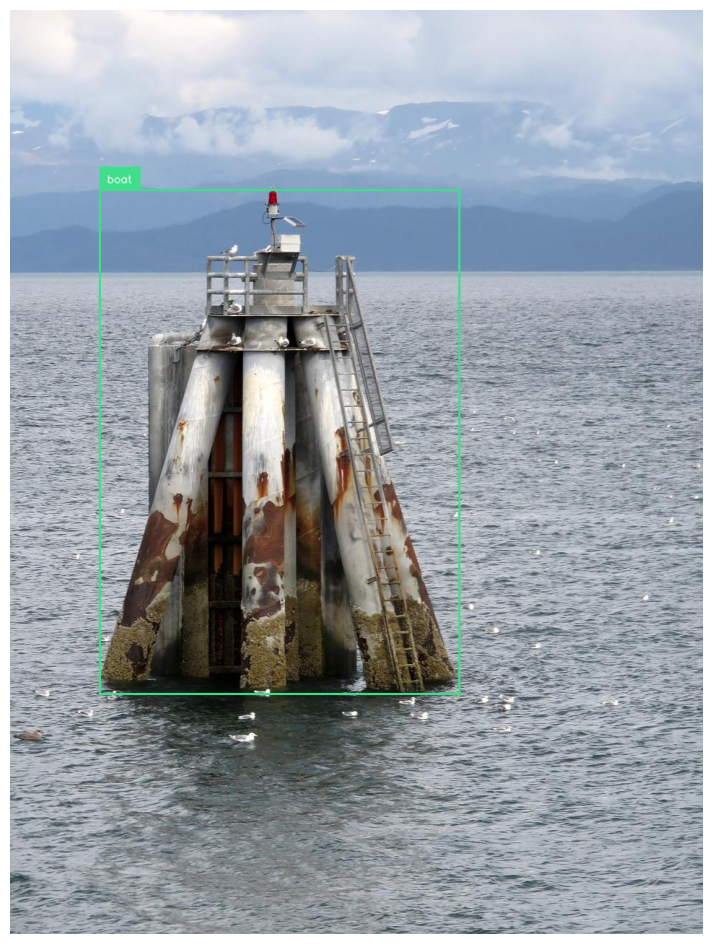

In [20]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'models/yolov10n.pt')
image = cv2.imread(f'{train_path}/images/buoy_alaska-ocean-warning-light-sea-2574393_jpg.rf.67cf23f5f470d5a05b08c87d7391e126.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

If using a dataset from Roboflow Universe, run the command below. 👇🏻

In [ ]:
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !sed -i '$d' {dataset.location}/data.yaml
# !echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [34]:
from ultralytics import YOLOv10

model = YOLOv10(f'models/yolov10n.pt')
NUM_EPOCHS = 30
run_name = f"yolov10-{NUM_EPOCHS}ep-2"

results = model.train(data=f'{HOME}/{data_path}/data.yaml', epochs=30, imgsz=640, name=run_name, patience=5)

New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=models/yolov10n.pt, data=/content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=yolov10-10ep-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=F

train: Scanning /content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v2/train/labels.cache... 1069 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1069/1069 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v2/valid/labels.cache... 267 images, 1 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov10-10ep-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10-10ep-2
Starting training for 30 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/30      3.66G      1.522      3.741      1.413      1.651      5.193      1.318         97        640: 100%|██████████| 67/67 [00:49<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


                   all        267       1005    0.00578      0.479     0.0653     0.0451

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/30      3.45G      1.609      2.797      1.476      1.659      4.463      1.323        154        640: 100%|██████████| 67/67 [00:51<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]


                   all        267       1005      0.674     0.0835       0.11     0.0671

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/30      3.41G       1.64      2.512      1.516      1.705      4.132      1.368         90        640: 100%|██████████| 67/67 [00:45<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


                   all        267       1005       0.39      0.185      0.109     0.0615

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/30      3.35G      1.669      2.328      1.501      1.795      3.778      1.366        104        640: 100%|██████████| 67/67 [00:45<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267       1005       0.48      0.169      0.154     0.0894



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/30      3.17G      1.543      2.246      1.467      1.625      3.714      1.365         89        640:  40%|████      | 27/67 [00:20<00:24,  1.62it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c70d6665510>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
       5/30      3.18G      1.575      2.241      1.493      1.676      3.625      1.386         87        640: 100%|██████████| 67/67 [00:53<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):

                   all        267       1005      0.491      0.185      0.166     0.0993

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/30      3.35G      1.562      2.167      1.456       1.69      3.386      1.352         54        640: 100%|██████████| 67/67 [00:46<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]


                   all        267       1005      0.518      0.196      0.174      0.104

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/30      3.47G       1.55      1.993      1.441       1.66       3.12      1.336        125        640: 100%|██████████| 67/67 [00:53<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]

                   all        267       1005      0.415      0.208      0.197       0.12



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/30      3.38G      1.545      1.994      1.432      1.677      2.985      1.349        116        640: 100%|██████████| 67/67 [00:45<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]


                   all        267       1005      0.573      0.224      0.241      0.157

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/30      3.48G      1.505      1.858      1.414      1.659      2.841       1.33        135        640: 100%|██████████| 67/67 [00:47<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]


                   all        267       1005      0.362      0.257      0.224      0.134

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/30      3.38G      1.502      1.868      1.396      1.638      2.748      1.306         89        640: 100%|██████████| 67/67 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]


                   all        267       1005      0.284       0.27      0.248      0.146

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/30      3.33G      1.452      1.793      1.402       1.57      2.638      1.328         83        640: 100%|██████████| 67/67 [00:46<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]


                   all        267       1005      0.514       0.27       0.25      0.153

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/30      3.36G      1.474      1.708      1.368      1.662      2.476      1.303         71        640: 100%|██████████| 67/67 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


                   all        267       1005      0.555      0.273      0.282      0.173

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/30      3.41G      1.442      1.655      1.353      1.612      2.413      1.291        109        640: 100%|██████████| 67/67 [00:57<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


                   all        267       1005      0.327       0.29      0.284       0.18

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/30      3.26G      1.407      1.583      1.327      1.571      2.302      1.267        118        640: 100%|██████████| 67/67 [00:45<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


                   all        267       1005      0.622      0.278      0.342      0.205

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/30      3.16G      1.361      1.515      1.314      1.553      2.195      1.264        114        640: 100%|██████████| 67/67 [00:45<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


                   all        267       1005      0.454      0.353       0.34      0.216

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/30      3.36G      1.424      1.524      1.346      1.598      2.174      1.289        118        640: 100%|██████████| 67/67 [00:55<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]


                   all        267       1005      0.362      0.339      0.334      0.213

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/30      3.47G      1.375      1.473      1.299      1.578      2.106      1.247        116        640: 100%|██████████| 67/67 [00:45<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]

                   all        267       1005      0.493       0.34      0.351      0.229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/30      3.77G      1.328      1.402      1.276      1.527      2.032      1.234         63        640: 100%|██████████| 67/67 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


                   all        267       1005      0.441      0.371      0.376      0.231

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/30      3.39G      1.326      1.376       1.29      1.502      1.958      1.238         58        640: 100%|██████████| 67/67 [00:47<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


                   all        267       1005      0.491      0.374      0.393       0.24

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/30      3.29G      1.295      1.367      1.286      1.489      1.976      1.236         96        640: 100%|██████████| 67/67 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]


                   all        267       1005      0.627      0.333      0.363      0.228
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/30      3.45G      1.297      1.454      1.265      1.445      2.127      1.238         25        640: 100%|██████████| 67/67 [00:56<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]

                   all        267       1005      0.469      0.376      0.371      0.244



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/30      3.16G      1.299      1.326      1.261      1.477      1.984      1.236         48        640: 100%|██████████| 67/67 [00:43<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]


                   all        267       1005      0.528      0.357      0.383      0.243

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/30      3.26G      1.247      1.284      1.237      1.422      1.916      1.208         47        640: 100%|██████████| 67/67 [00:42<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]


                   all        267       1005      0.599       0.38      0.404      0.256

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/30      3.13G      1.213      1.204      1.198      1.434      1.802      1.187         32        640: 100%|██████████| 67/67 [00:53<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]


                   all        267       1005      0.529      0.433      0.418      0.272

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/30      3.27G       1.22      1.194      1.201      1.402      1.791      1.183         37        640: 100%|██████████| 67/67 [00:44<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]


                   all        267       1005      0.475      0.416      0.417      0.264

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/30      3.28G      1.193      1.163      1.193      1.383      1.731      1.177         23        640: 100%|██████████| 67/67 [00:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


                   all        267       1005      0.526      0.394      0.412       0.27

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/30      3.31G      1.196       1.12      1.178      1.397       1.69      1.164         28        640: 100%|██████████| 67/67 [00:53<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]


                   all        267       1005      0.639      0.358      0.419      0.274

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/30      3.28G      1.166      1.099      1.173      1.368      1.629      1.159         52        640: 100%|██████████| 67/67 [00:43<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]


                   all        267       1005      0.596      0.409      0.446      0.277

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/30      3.28G       1.16      1.053      1.155      1.369      1.605      1.149         50        640: 100%|██████████| 67/67 [00:42<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]


                   all        267       1005      0.546      0.425      0.428      0.277

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/30      3.19G      1.136      1.044      1.155      1.318      1.577      1.148         23        640: 100%|██████████| 67/67 [00:51<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]


                   all        267       1005      0.536      0.417      0.431       0.28

30 epochs completed in 0.502 hours.
Optimizer stripped from runs/detect/yolov10-10ep-2/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/yolov10-10ep-2/weights/best.pt, 5.7MB

Validating runs/detect/yolov10-10ep-2/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2698316 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]


                   all        267       1005      0.536      0.417      0.431      0.281
                  boat        267         86      0.241       0.14      0.133     0.0444
                  buoy        267        153      0.484       0.27      0.257     0.0925
           cruise ship        267         49       0.78      0.918      0.931      0.802
            ferry boat        267         38      0.495      0.309      0.375      0.289
          freight boat        267         19      0.217     0.0526     0.0743     0.0375
               gondola        267        169       0.58      0.609      0.674      0.351
       inflatable boat        267          4          1          0     0.0684     0.0408
                 kayak        267         97      0.492      0.489      0.502      0.315
            paper boat        267         14      0.481      0.857      0.743      0.514
              sailboat        267        376      0.589      0.521      0.556      0.324
Speed: 0.9ms preproce

In [ ]:
run_name

In [ ]:
Image(filename=f'{HOME}/runs/detect/{run_name}/confusion_matrix.png', width=600)

In [ ]:
Image(filename=f'{HOME}/runs/detect/{run_name}/results.png', width=600)

/content/MyDrive/MyDrive/maritime_challenge


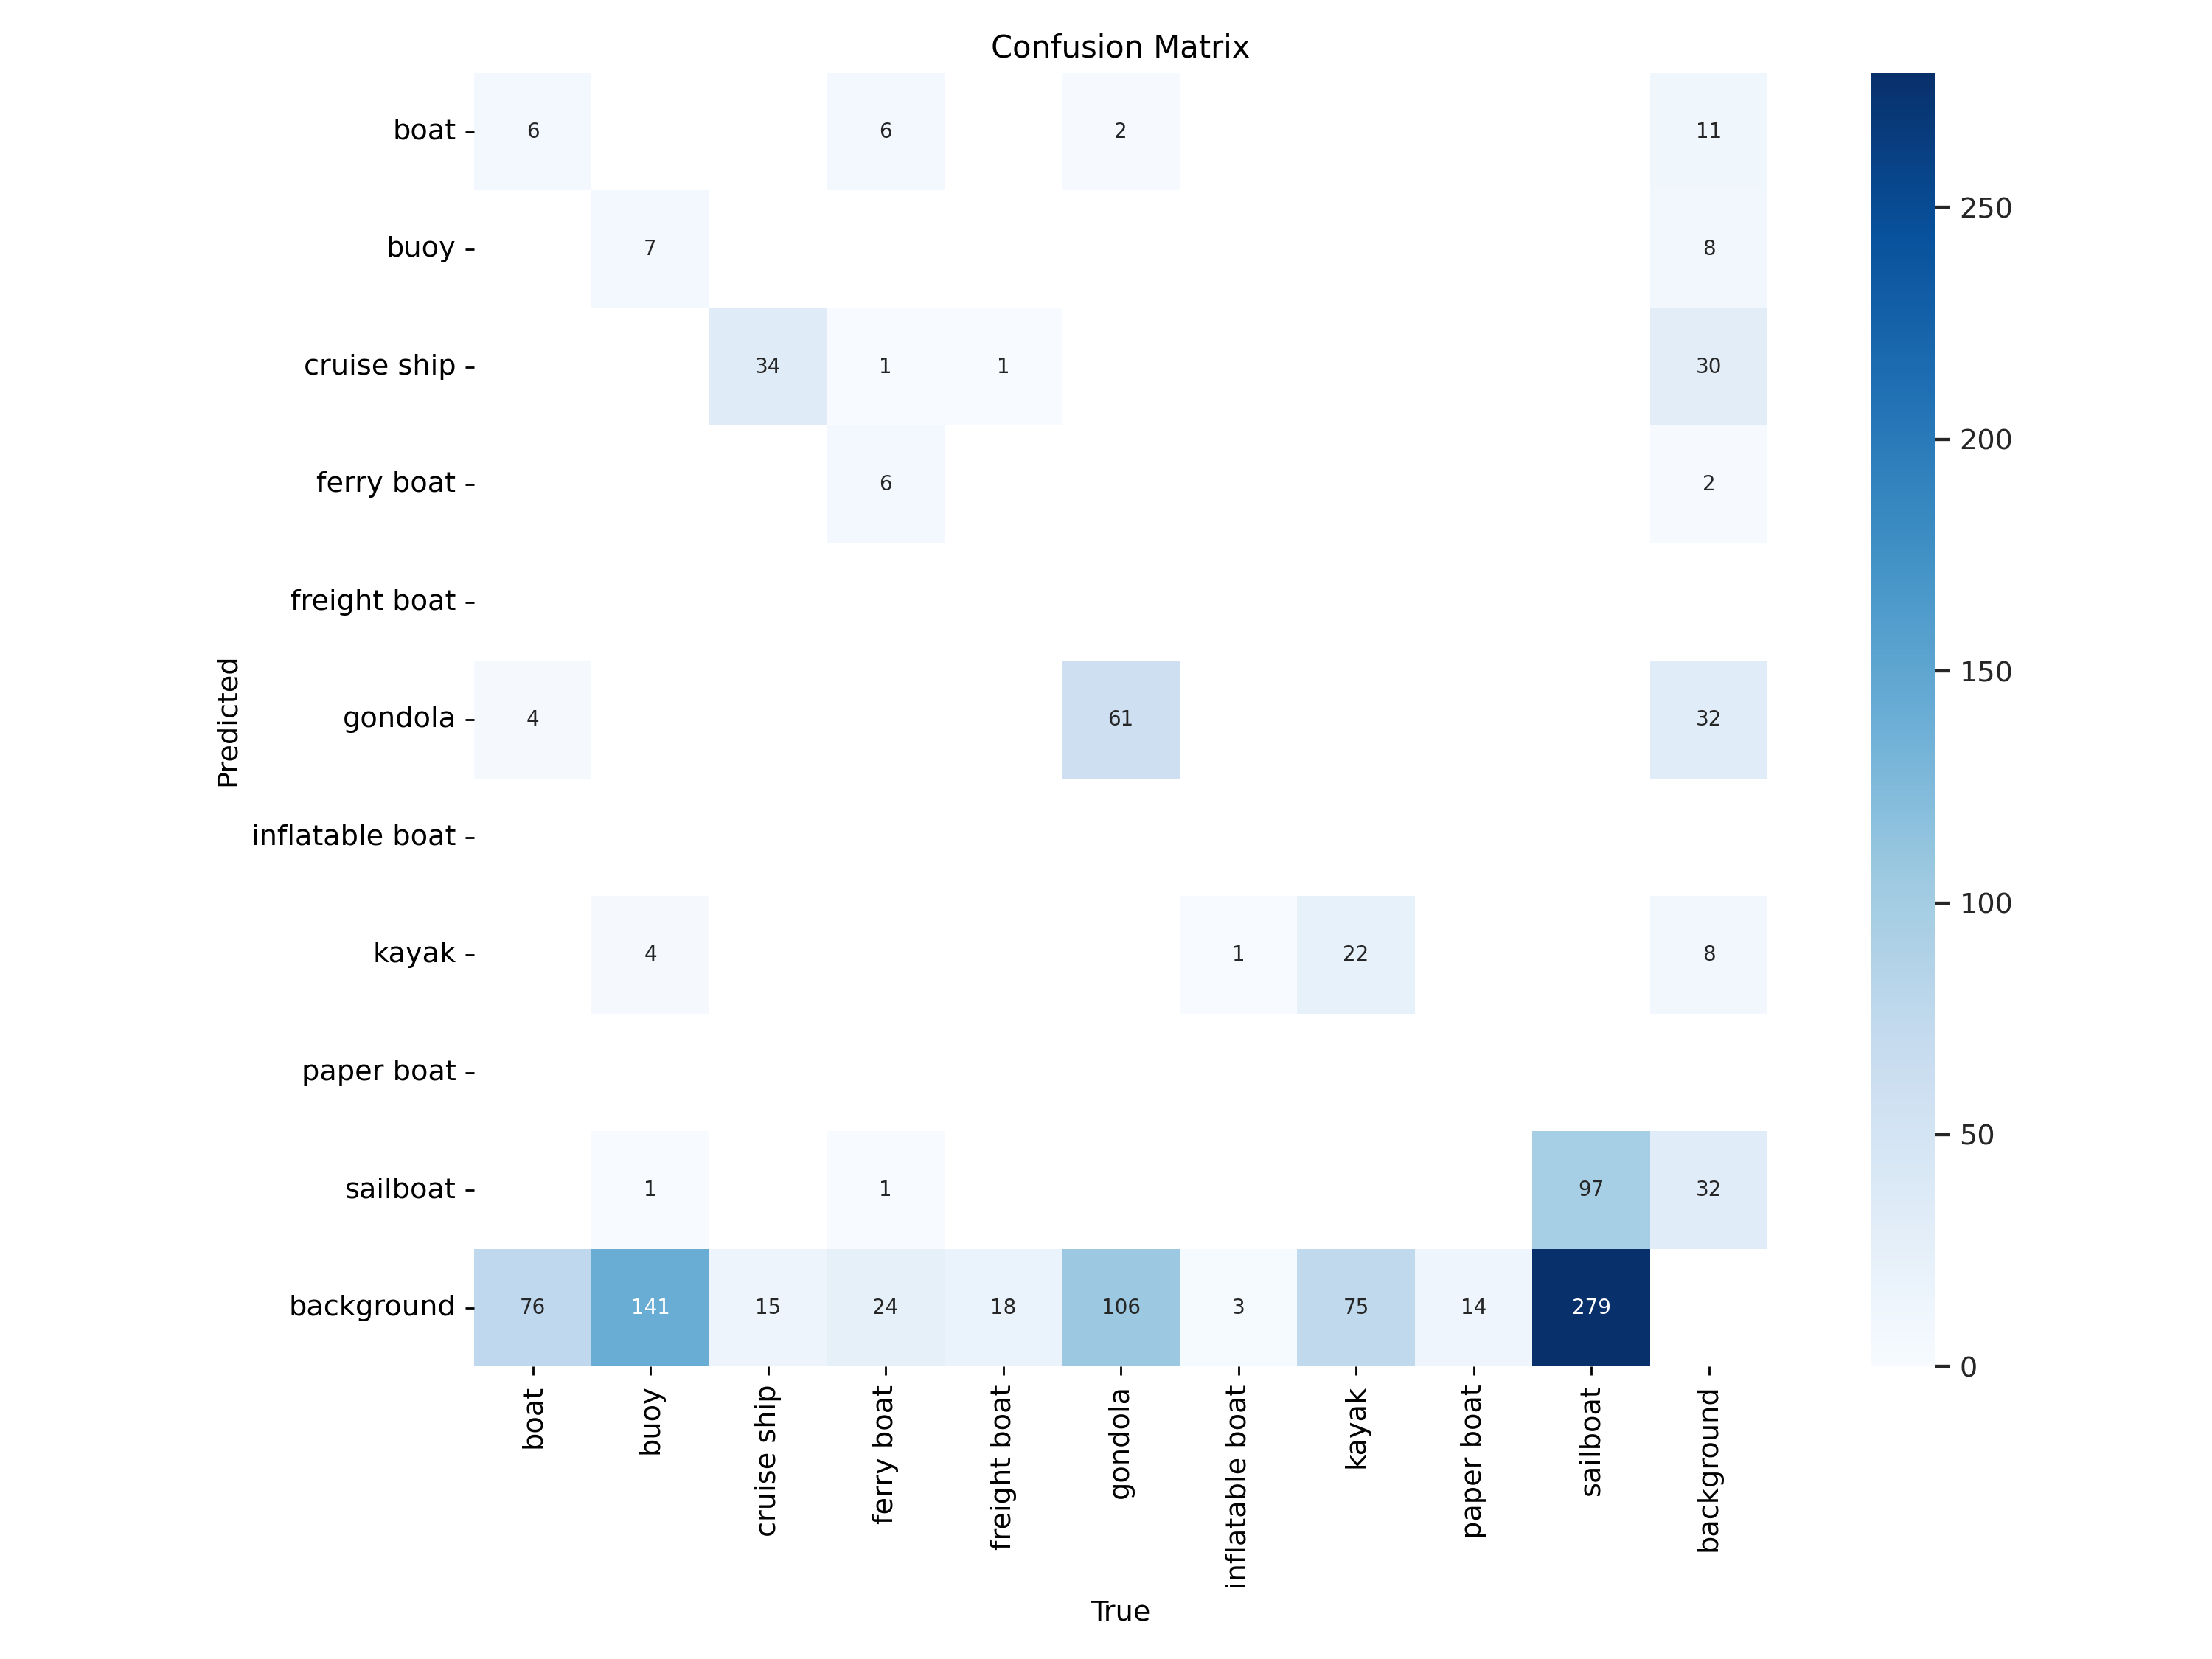

In [30]:
Image(filename=f'{HOME}/runs/detect/{run_name}/confusion_matrix.png', width=600)

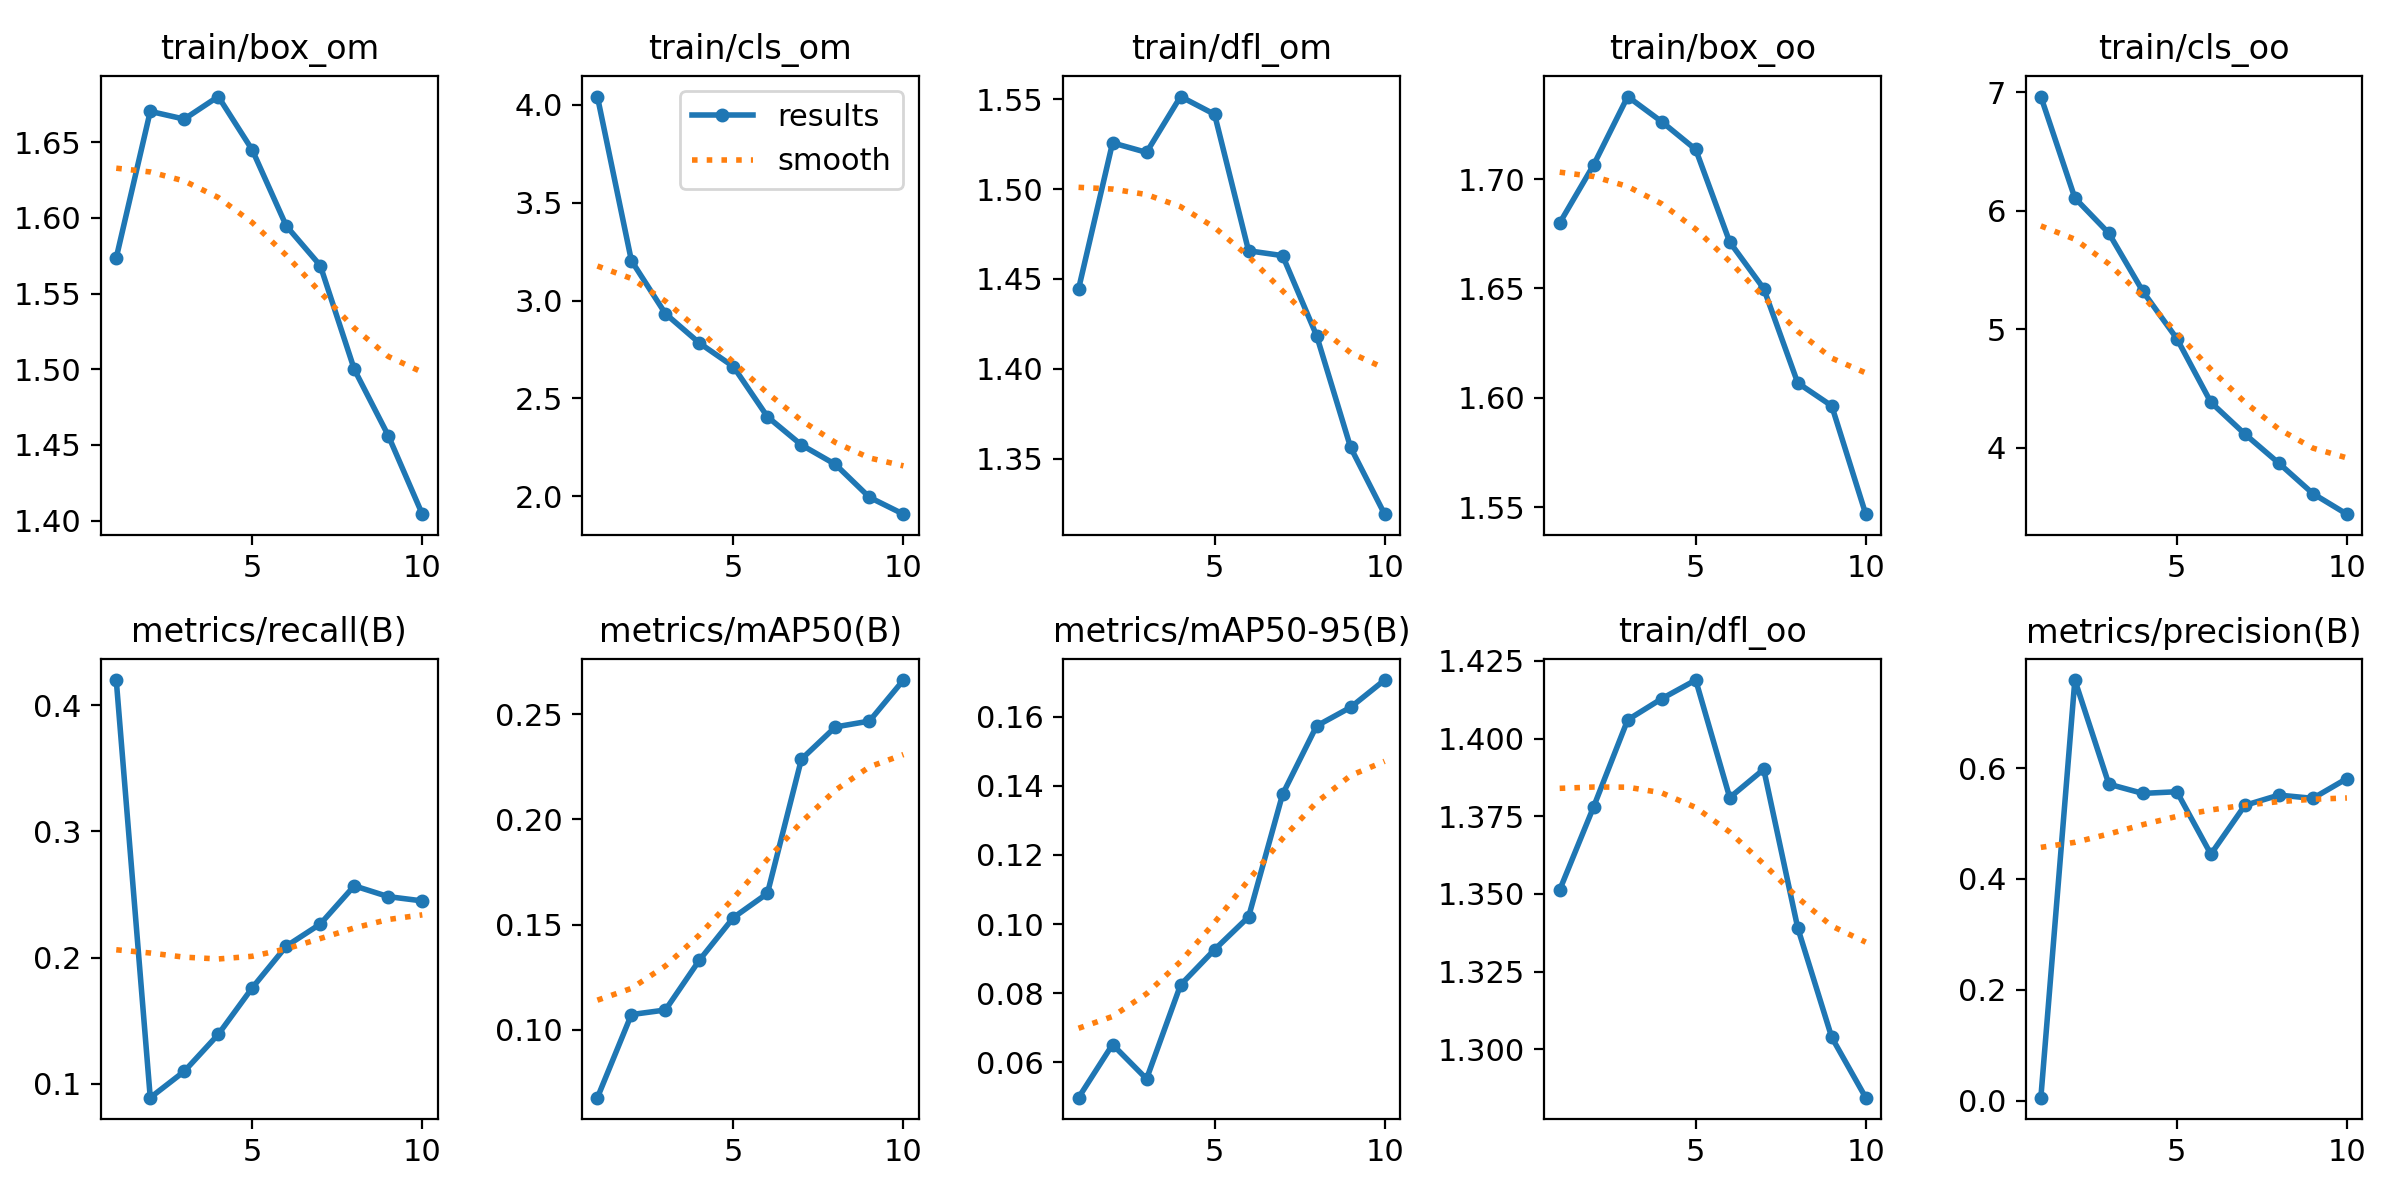

In [33]:
Image(filename=f'{HOME}/runs/detect/{run_name}/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [ ]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 640x640 1 tumor, 56.7ms
Speed: 2.0ms preprocess, 56.7ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)


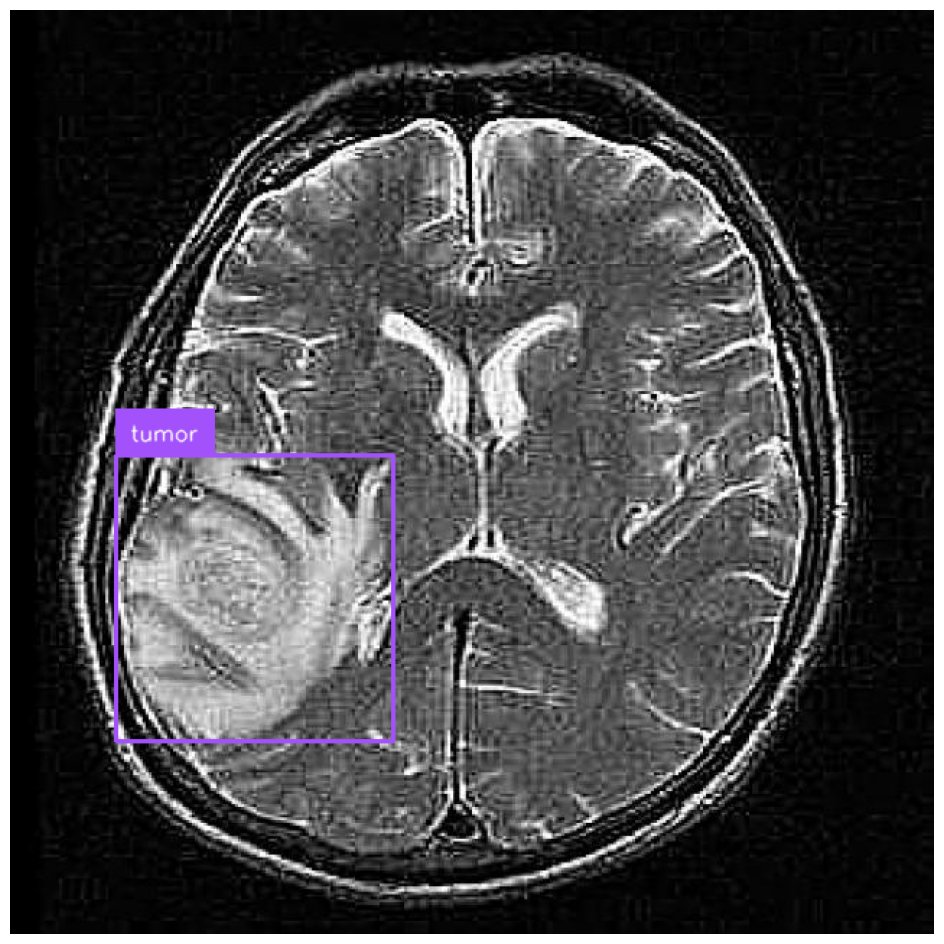

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)